In [1]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt


import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.stats import binned_statistic

import seaborn as sns

import statsmodels.api as sm

from scipy import stats

In [2]:
dwarf_table = Table.read('dwarf_table.txt', format = 'ascii.commented_header')
dwarf_table[:5]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,BPTclass,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282840855419636,-15.534673690795898,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,1.0,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,1.0,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323036760092,-15.290872573852539,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,1.0,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734
199.39,1.0,146.00780426178756,-0.6422574964819474,0.004776299931108952,-15.831652641296387,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,1.0,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635022610426,-16.34455108642578,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,1.0,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549


In [3]:
cmd_values = Table.read('errors_CMD_table.txt', format = 'ascii.commented_header')
cmd_values[:5]

u_r_err,sSFR_err,CMD_class,ELPETRO_AMIVAR_r,ID
float64,float64,int64,float64,int64
0.019882047548890114,nan,-99,2487.77734375,0
0.19388361275196075,1.169804573059082,2,2198.116455078125,1
0.1018315926194191,nan,-99,1406.6728515625,2
0.22052867710590363,1.3031730651855469,3,128.3397674560547,3
0.22563263773918152,nan,-99,1161.7567138671875,4


In [4]:
dwarf_table = join(dwarf_table, cmd_values, join_type='left', keys='ID')

In [5]:
dwarf_table

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,BPTclass,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir,u_r_err,sSFR_err,CMD_class,ELPETRO_AMIVAR_r
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,float64,float64,int64,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282840855419636,-15.534673690795898,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,1.0,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463,0.08410719037055969,0.5447912216186523,2,1759.3416748046875
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,1.0,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274,0.1891634464263916,0.5290708541870117,1,705.89501953125
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323036760092,-15.290872573852539,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,1.0,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734,0.04690810292959213,0.8169212341308594,1,1947.9483642578125
199.39,1.0,146.00780426178756,-0.6422574964819474,0.004776299931108952,-15.831652641296387,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,1.0,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821,0.010177218355238438,0.38345956802368164,1,2423.86083984375
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635022610426,-16.34455108642578,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,1.0,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549,0.037948835641145706,0.5800094604492188,1,2307.06201171875
21.37,1.0,146.28299647851426,0.0641463074401177,0.021579895168542862,-16.594152450561523,2.861306369304657,-10.189197540283203,nan,nan,nan,nan,nan,nan,nan,2,91,1.0,80,0.038323438909891316,92,0.17226127693210824,92,0.10268810550034341,92,0.3052372880294029,0.3047657012939453,0.5753030776977539,2,1595.2012939453125
0.0,1.0,145.3209420527222,0.771115298508063,0.00658948952332139,-14.810564994812012,1.925416886806488,-9.748167991638184,nan,0.0,3.57494352664153,7.007952737418975,0.2935407103312847,-0.9956427104372425,0.4090425521885854,2,186,1.0,208,0.16133006586884238,208,0.576340261650062,208,0.6516081633066332,208,2.3278241244801396,0.09068658947944641,0.44332408905029297,2,1937.6204833984375
-99.0,1.0,145.4212238164792,0.5359777701124617,0.1459859162569046,-14.866592407226562,-3.4473413228988647,nan,nan,nan,nan,nan,nan,nan,nan,9,209,nan,206,0.23624643923335842,206,0.5428900018158784,206,0.53709656480362,206,1.2342380947105809,30.633142471313477,nan,-99,0.0
0.0,1.0,146.26576246056774,1.2304320197663696,0.006355164106935263,-14.2352876663208,1.6930833458900452,-9.700735092163086,nan,0.0,4.040375795270858,7.048466376827344,0.3785143362106475,-1.2323400004904403,0.5170923842950506,2,238,1.0,55137,0.13915957213413985,55243,0.8924983833408165,55137,0.18685834815465546,208,1.4133282793228592,0.14035305380821228,0.8864994049072266,1,200.1648712158203


In [6]:
new_metallicities = Table.read('new_metallicities.txt', format = 'ascii.commented_header')
new_metallicities

ID,Z12logOH_N2,Z12logOH_O3N2,Z12logOH_N2O2
int64,float64,float64,float64
0,nan,nan,nan
1,9.24100978108516,9.932579564097487,9.550688864062717
2,nan,nan,nan
3,9.006879083032793,9.531955308832202,8.792412403614268
4,nan,nan,nan
5,9.231683652961154,9.388994080579156,9.186057390386843
6,9.74394359865935,9.822147352557094,9.681489570907425
7,8.925481829348604,9.859745839672499,9.193186243794619
8,9.063539942735755,9.781663701398578,9.057058458225855


In [7]:
new_metallicities['ID'] = new_metallicities['ID'].filled(-1)
new_metallicities['Z12logOH_N2'] = new_metallicities['Z12logOH_N2'].filled(np.nan)
new_metallicities['Z12logOH_N2O2'] = new_metallicities['Z12logOH_N2O2'].filled(np.nan)
new_metallicities['Z12logOH_O3N2'] = new_metallicities['Z12logOH_O3N2'].filled(np.nan)

In [8]:
dwarf_table = join(dwarf_table, new_metallicities, join_type='left', keys='ID')

In [9]:
t3mask = dwarf_table['t3'] < 3  # Makes a boolean selection mask (numpy array)
dwarf_t3= dwarf_table[t3mask]

In [10]:
# Separating into Void, Wall, or Other Dwarf Galaxies

dwarf_wall = dwarf_table['vflag_VF']==0
dwarf_void = dwarf_table['vflag_VF']==1
dwarf_other = ~(dwarf_wall | dwarf_void)


dwarf_wall_t3 = dwarf_t3['vflag_VF']==0
dwarf_void_t3 = dwarf_t3['vflag_VF']==1
dwarf_other_t3 = ~(dwarf_wall_t3 | dwarf_void_t3)

In [11]:
# Separating into Void, Wall, or Other Dwarf Galaxies

blue_cloud = dwarf_table['CMD_class']== 1
green_valley = dwarf_table['CMD_class']== 2
red_seq = dwarf_table['CMD_class']== 3

no_class = ~(blue_cloud | red_seq | green_valley)
a_class = blue_cloud | red_seq | green_valley
a_class_wall = blue_cloud[dwarf_wall] | red_seq[dwarf_wall] | green_valley[dwarf_wall]
a_class_void = blue_cloud[dwarf_void] | red_seq[dwarf_void] | green_valley[dwarf_void]

blue_cloud_t3 = dwarf_t3['CMD_class']== 1
green_valley_t3 = dwarf_t3['CMD_class']== 2
red_seq_t3 = dwarf_t3['CMD_class']== 3

no_class_t3 = ~(blue_cloud_t3 | red_seq_t3 | green_valley_t3)
#a_class

In [12]:
sfd = dwarf_table['BPTclass'] == 1
sfd_t3 = dwarf_t3['BPTclass'] == 1

non_sfd = dwarf_table['BPTclass'] != 1
non_sfd_t3 = dwarf_t3['BPTclass'] != 1

## color 2D

0.025563779019724113
0.009231920628656007
0.048123944573461315
0.013371899176885964
0.2871724143940532
0.05341293000700869


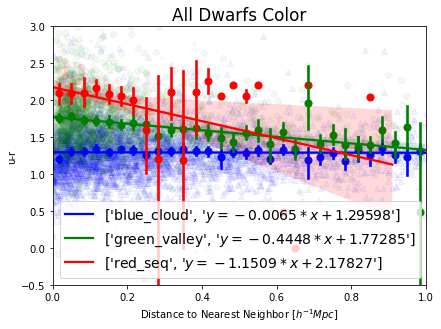

In [13]:
d_max = 1
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
for select, mc, label, c, m in zip([blue_cloud, green_valley, red_seq], ['blue', 'green', 'red'],
                                   ['blue_cloud', 'green_valley', 'red_seq'], ['b','g', 'r'], ['^', 'o', '+']):
    
    #d_all = dwarf_table['2D_neighbor_dist'][select & sfd]
    #vals_all = dwarf_table['u_r'][select & sfd]
    
    d_all = dwarf_table['2D_neighbor_dist'][select]
    vals_all = dwarf_table['u_r'][select]

    mask = (d_all > 0) & (d_all <= 1)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = np.isfinite(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.05, color=c, marker=m)
        
    xedges = np.linspace(0,1,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
    
    #slope, intercept, r_value, pv, stderr, intercept_stderr = stats.linregress(d[nonan], vals[nonan])
    
    result = stats.linregress(d[nonan], vals[nonan])
    
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label,
                #line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax,  
                #line_kws={'label': [label, '$y=%3.7s*x+%3.7s$'%(slope, intercept)]})
    
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax,  
                line_kws={'label': [label, '$y=%3.7s*x+%3.7s$'%(result.slope, result.intercept)]})
        
   
    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='u-r', xlim=(0,1), ylim=(-0.5,3));
    plt.title('All Dwarfs Color')   
    ax.legend(prop={'size': 14})
    
    print(result.stderr)
    print(result.intercept_stderr)

### only wall dwarfs

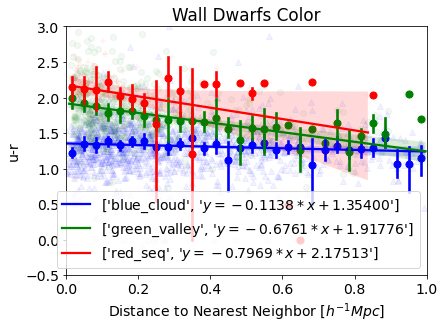

In [14]:
d_max = 1
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
for select, mc, label, c, m in zip([blue_cloud[dwarf_wall], green_valley[dwarf_wall], red_seq[dwarf_wall]], ['blue', 'green', 'red'],
                                   ['blue_cloud', 'green_valley', 'red_seq'], ['b','g', 'r'], ['^', 'o', '+']):
    
    #d_all = dwarf_table['2D_neighbor_dist'][select & sfd]
    #vals_all = dwarf_table['u_r'][select & sfd]
    
    d_all = dwarf_table[dwarf_wall]['2D_neighbor_dist'][select]
    vals_all = dwarf_table[dwarf_wall]['u_r'][select]

    mask = (d_all > 0) & (d_all <= 1)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = np.isfinite(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.05, color=c, marker=m)
        
    xedges = np.linspace(0,1,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
    
    #slope, intercept, r_value, pv, stderr, intercept_stderr = stats.linregress(d[nonan], vals[nonan])
    
    result = stats.linregress(d[nonan], vals[nonan])
    
    
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax,  
                line_kws={'label': [label, '$y=%3.7s*x+%3.7s$'%(result.slope, result.intercept)]})
        
   
    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='u-r', xlim=(0,1), ylim=(-0.5,3));
    plt.title('Wall Dwarfs Color')     
    ax.legend(prop={'size': 14})

### void dwarfs only

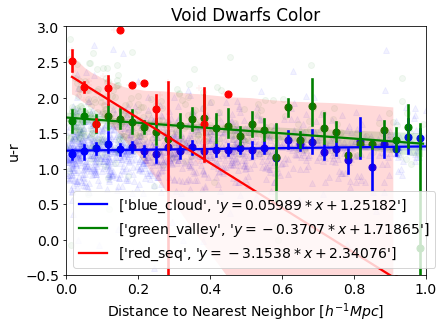

In [15]:
d_max = 1
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
for select, mc, label, c, m in zip([blue_cloud[dwarf_void], green_valley[dwarf_void], red_seq[dwarf_void]], ['blue', 'green', 'red'],
                                   ['blue_cloud', 'green_valley', 'red_seq'], ['b','g', 'r'], ['^', 'o', '+']):
    
    #d_all = dwarf_table['2D_neighbor_dist'][select & sfd]
    #vals_all = dwarf_table['u_r'][select & sfd]
    
    d_all = dwarf_table[dwarf_void]['2D_neighbor_dist'][select]
    vals_all = dwarf_table[dwarf_void]['u_r'][select]

    mask = (d_all > 0) & (d_all <= 1)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = np.isfinite(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.05, color=c, marker=m)
        
    xedges = np.linspace(0,1,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
    
    #slope, intercept, r_value, pv, stderr, intercept_stderr = stats.linregress(d[nonan], vals[nonan])
    
    result = stats.linregress(d[nonan], vals[nonan])
    
    
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax,  
                line_kws={'label': [label, '$y=%3.7s*x+%3.7s$'%(result.slope, result.intercept)]})
    plt.title('Void Dwarfs Color')   
   
    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='u-r', xlim=(0,1), ylim=(-0.5,3));
        
    ax.legend(prop={'size': 14})

## star formation rate

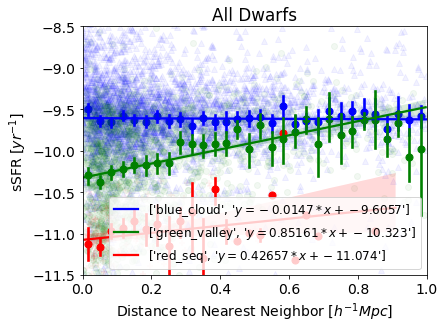

In [16]:
d_max = 1
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
for select, mc, label, c, m in zip([blue_cloud, green_valley, red_seq], ['blue', 'green', 'red'],
                                   ['blue_cloud', 'green_valley', 'red_seq'], ['b','g', 'r'], ['^', 'o', '+']):
    
    #d_all = dwarf_table['2D_neighbor_dist'][select & sfd]
    #vals_all = dwarf_table['sSFR'][select & sfd]
    
    d_all = dwarf_table['2D_neighbor_dist'][select]
    vals_all = dwarf_table['sSFR'][select]

    mask = (d_all > 0) & (d_all <= 1)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = np.isfinite(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.05, color=c, marker=m)
        
    xedges = np.linspace(0,1,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
    
    result = stats.linregress(d[nonan], vals[nonan])
    
    
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax,  
                line_kws={'label': [label, '$y=%3.7s*x+%3.7s$'%(result.slope, result.intercept)]})
        
   
    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='sSFR [$yr^{-1}]$', xlim=(0,1), ylim=(-11.5,-8.5));
        
    ax.legend(prop={'size': 12})
    
    plt.title('All Dwarfs') 

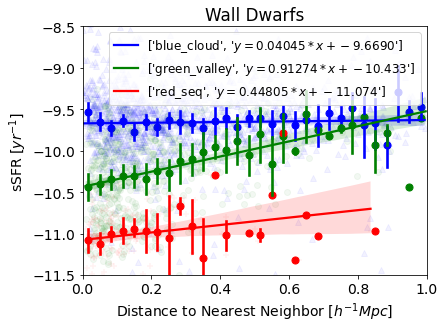

In [17]:
d_max = 1
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
for select, mc, label, c, m in zip([blue_cloud[dwarf_wall], green_valley[dwarf_wall], red_seq[dwarf_wall]], ['blue', 'green', 'red'],
                                   ['blue_cloud', 'green_valley', 'red_seq'], ['b','g', 'r'], ['^', 'o', '+']):
    
    #d_all = dwarf_table[dwarf_wall]['2D_neighbor_dist'][select & sfd]
    #vals_all = dwarf_table[dwarf_wall]['sSFR'][select & sfd]
    
    d_all = dwarf_table[dwarf_wall]['2D_neighbor_dist'][select]
    vals_all = dwarf_table[dwarf_wall]['sSFR'][select]

    mask = (d_all > 0) & (d_all <= 1)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = np.isfinite(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.05, color=c, marker=m)
        
    xedges = np.linspace(0,1,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
    
    result = stats.linregress(d[nonan], vals[nonan])
    
    
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax,  
                line_kws={'label': [label, '$y=%3.7s*x+%3.7s$'%(result.slope, result.intercept)]})
        
    plt.title('Wall Dwarfs') 
    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='sSFR [$yr^{-1}]$', xlim=(0,1), ylim=(-11.5,-8.5));
        
    ax.legend(prop={'size': 12})

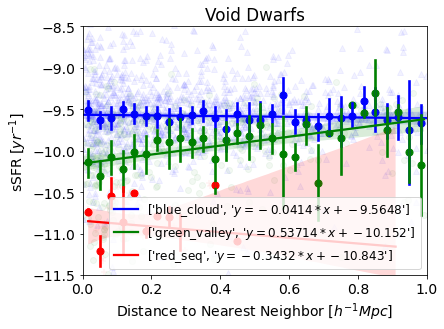

In [18]:
d_max = 1
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
for select, mc, label, c, m in zip([blue_cloud[dwarf_void], green_valley[dwarf_void], red_seq[dwarf_void]], ['blue', 'green', 'red'],
                                   ['blue_cloud', 'green_valley', 'red_seq'], ['b','g', 'r'], ['^', 'o', '+']):
    
    #d_all = dwarf_table[dwarf_void]['2D_neighbor_dist'][select & sfd]
    #vals_all = dwarf_table[dwarf_void]['sSFR'][select & sfd]
    
    d_all = dwarf_table[dwarf_void]['2D_neighbor_dist'][select]
    vals_all = dwarf_table[dwarf_void]['sSFR'][select]

    mask = (d_all > 0) & (d_all <= 1)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = np.isfinite(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.05, color=c, marker=m)
        
    xedges = np.linspace(0,1,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
    
    result = stats.linregress(d[nonan], vals[nonan])
    
    
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax,  
                line_kws={'label': [label, '$y=%3.7s*x+%3.7s$'%(result.slope, result.intercept)]})
        
    plt.title('Void Dwarfs') 
    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='sSFR [$yr^{-1}]$', xlim=(0,1), ylim=(-11.5,-8.5));
        
    ax.legend(prop={'size': 12})

## metallicity

/Users/caseyannhorvath/.conda/envs/voids/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/caseyannhorvath/.conda/envs/voids/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/caseyannhorvath/.conda/envs/voids/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


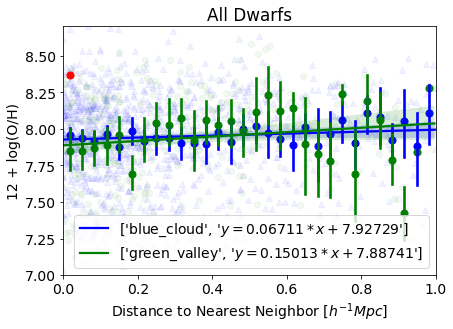

In [19]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
d_max = 1
for select, mc, label, c, m in zip([blue_cloud_t3, green_valley_t3, red_seq_t3], ['blue', 'green', 'red'],
                                   ['blue_cloud', 'green_valley', 'red_seq'], ['b','g', 'r'], ['^', 'o', '+']):
    
    d_all = dwarf_t3['2D_neighbor_dist'][select & sfd_t3]
    vals_all = dwarf_t3['Z12logOH'][select & sfd_t3]
    
    #d_all = dwarf_t3['2D_neighbor_dist'][select]
    #vals_all = dwarf_t3['Z12logOH'][select]
    
    mask = (d_all > 0) & (d_all <= 1)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = ~np.isnan(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.05, color=c, marker=m)
        
    xedges = np.linspace(0,1,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
    
    result = stats.linregress(d[nonan], vals[nonan])
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax,  
                line_kws={'label': [label, '$y=%3.7s*x+%3.7s$'%(result.slope, result.intercept)]})

        
    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='12 + log(O/H)', xlim=(0,1), ylim=(7,8.7));
    plt.title('All Dwarfs')     
    ax.legend()
        

### N2 metallicity method

-0.13775975082223588
8.28141232777271
8.534425004332137


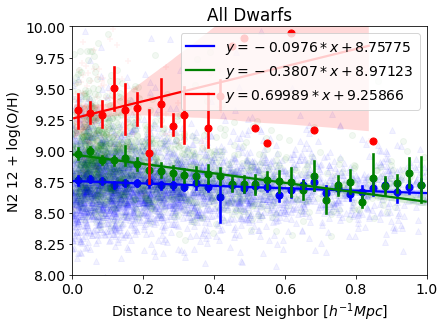

In [20]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
d_max = 1
for select, mc, label, c, m in zip([blue_cloud, green_valley, red_seq], ['blue', 'green', 'red'],
                                   ['blue_cloud', 'green_valley', 'red_seq'], ['b','g', 'r'], ['^', 'o', '+']):
    
    #d_all = dwarf_table2['2D_neighbor_dist'][select & sfd]
    #vals_all = dwarf_table2['Z12logOH_N2'][select & sfd]
    
    d_all = dwarf_table['2D_neighbor_dist'][select]
    vals_all = dwarf_table['Z12logOH_N2'][select]
    
    mask = (d_all > 0) & (d_all <= 1)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = np.isfinite(vals)
    
    print(np.min(vals[nonan]))
    
    ax.scatter(d[nonan], vals[nonan], alpha=0.05, color=c, marker=m)
        
    xedges = np.linspace(0,1,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
    #sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
    slope, intercept, r_value, pv, se = stats.linregress(d[nonan], vals[nonan])
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, 
                line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})      
        
    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='N2 12 + log(O/H)', xlim=(0,1), ylim=(8,10));
    plt.title('All Dwarfs')    
    ax.legend()
        
    #fig.savefig('sfd_Z12logOH_2D_LR.png')

## logNO

/Users/caseyannhorvath/.conda/envs/voids/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/caseyannhorvath/.conda/envs/voids/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/caseyannhorvath/.conda/envs/voids/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


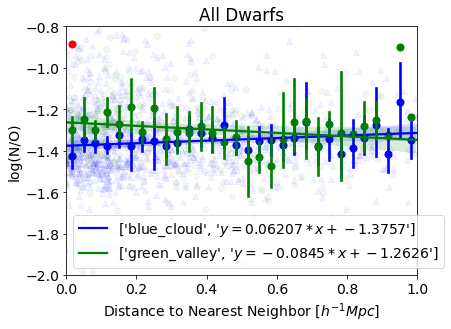

In [21]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
d_max = 1
for select, mc, label, c, m in zip([blue_cloud_t3, green_valley_t3, red_seq_t3], ['blue', 'green', 'red'],
                                   ['blue_cloud', 'green_valley', 'red_seq'], ['b','g', 'r'], ['^', 'o', '+']):
    
    d_all = dwarf_t3['2D_neighbor_dist'][select & sfd_t3]
    vals_all = dwarf_t3['logNO'][select & sfd_t3]
    
    mask = (d_all > 0) & (d_all <= 1)
    d = d_all[mask]
    vals = vals_all[mask]
    
    nonan = ~np.isnan(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.05, color=c, marker=m)
        
    xedges = np.linspace(0,1,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
    
    result = stats.linregress(d[nonan], vals[nonan])
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax,  
                line_kws={'label': [label, '$y=%3.7s*x+%3.7s$'%(result.slope, result.intercept)]})
        
    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='log(N/O)', xlim=(0,1), ylim=(-2,-0.8));
    plt.title('All Dwarfs')    
    ax.legend()

# Fraction of Mag-Color Class verses Distance

Used this for plotting help: https://stackoverflow.com/questions/19222711/python-histogram-with-points-and-error-bars

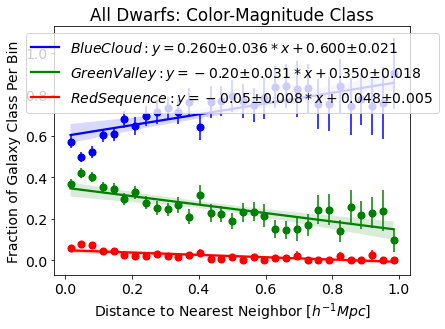

[726 832 697 574 491 372 343 302 229 251 198 161 158 131 152 131 112 111
  74  80  75  46  59  53  45  50  39  50  39  25  31]


In [65]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)
plt.rcParams.update({'font.size': 14})
d_max = 1

x1 = dwarf_table['2D_neighbor_dist'][a_class] #all values with a 2D neighbor distance and listed CMD class
#x1 = dwarf_table['2D_neighbor_dist'][a_class & sfd]
#x1 = dwarf_table['2D_neighbor_dist'][a_class & non_sfd]

for select, label, c in zip([blue_cloud, green_valley, red_seq], ['Blue Cloud', 'Green Valley', 'Red Sequence'], ['b','g', 'r']):
#for select, label, c in zip([blue_cloud[sfd], green_valley[sfd], red_seq[sfd]], ['blue_cloud', 'green_valley', 'red_seq'], ['b','g', 'r']):
#for select, label, c in zip([blue_cloud[non_sfd], green_valley[non_sfd], red_seq[non_sfd]], ['blue_cloud', 'green_valley', 'red_seq'], ['b','g', 'r']): 
    
    x = dwarf_table['2D_neighbor_dist'][select] #values with a 2D distance for each CMD class                        
    #x = dwarf_table['2D_neighbor_dist'][sfd][select] #values with a 2D distance for each CMD class
    #x = dwarf_table['2D_neighbor_dist'][non_sfd][select] #values with a 2D distance for each CMD class
                             
    
    counts,bin_edges = np.histogram(x,31, range = (0,1)) #counts = number of objects in each bin for each class
    
    counts2,bin_edges2 = np.histogram(x1,31, range = (0,1)) #counts2 = number of objects total in each bin
    
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.

    #print(counts)
    
    fraction = counts/counts2 # (number of objects with specific class / total objects) for each bin
    err = np.sqrt(counts)/counts2 #calculating error for each point 
    
    #plt.errorbar(bin_centers, fraction, yerr=err, fmt='o', color = c, label = label) #plotting points and error bars
    
    #adding fit line
    result = stats.linregress(bin_centers, fraction)
    sns.regplot(x=bin_centers, y=fraction, x_bins=bin_centers, color=c, ax=ax,  
                line_kws={'label': '$%s : y=%3.5s ± %3.5s*x+%3.5s± %3.5s$'%(label,
                                                                               result.slope,
                                                                               result.stderr,
                                                                               result.intercept,
                                                                               result.intercept_stderr)})
    
    plt.errorbar(bin_centers, fraction, yerr=err, fmt='o', color = c) #, label = label) #plotting points and error bars
    
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('Fraction of Galaxy Class Per Bin')

plt.title('All Dwarfs: Color-Magnitude Class')
#plt.title('Star Forming Dwarfs')
#plt.title('Non Star Forming Dwarfs')

plt.legend(loc = 'upper center')
plt.show()

fig.savefig('color_mag.png', dpi = 300, format = 'png')

print(counts2)

### Wall dwarfs only

[ 66 101 111 115 104  85  73  84  64  52  50  42  37  36  39  41  32  33
  24  26  19  11  14  11  12  16  10  12   7  11   7]
[38 77 81 62 57 32 48 36 23 19 23  7 15  5 12 10  7 10  3  4  3  1  1  4
  3  3  2  4  0  1  1]
[18 33 31 15 16  4  5  3  2  3  3  1  4  0  1  2  0  2  0  1  1  1  0  0
  0  1  0  0  0  0  0]


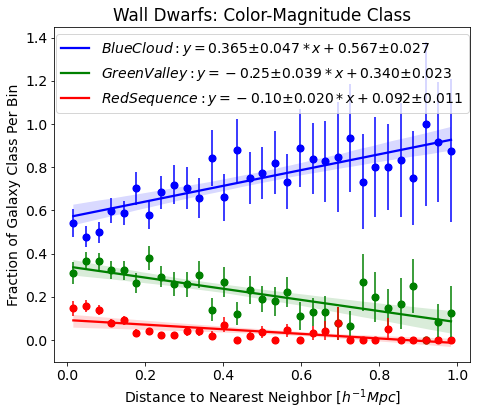

[122 211 223 192 177 121 126 123  89  74  76  50  56  41  52  53  39  45
  27  31  23  13  15  15  15  20  12  16   7  12   8]


In [69]:
fig, ax = plt.subplots(1,1, figsize=(7,6), tight_layout=True)
plt.rcParams.update({'font.size': 14})
d_max = 1

a = dwarf_table['2D_neighbor_dist'][dwarf_wall]
x1 = a[a_class_wall] #all values with a 2D neighbor distance and listed CMD class

for select, label, c in zip([blue_cloud[dwarf_wall], green_valley[dwarf_wall], red_seq[dwarf_wall]], ['Blue Cloud', 'Green Valley', 'Red Sequence'], ['b','g', 'r']):
    
    x = dwarf_table['2D_neighbor_dist'][dwarf_wall][select] #values with a 2D distance for each CMD class
    
    counts,bin_edges = np.histogram(x,31, range = (0,1)) #counts = number of objects in each bin for each class
    
    counts2,bin_edges2 = np.histogram(x1,31, range = (0,1)) #counts2 = number of objects total in each bin
    
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.

    print(counts)
    
    fraction = counts/counts2 # (number of objects with specific class / total objects) for each bin
    err = np.sqrt(counts)/counts2 #calculating error for each point 
    
    #plt.errorbar(bin_centers, fraction, yerr=err, fmt='o', color = c, label = label) #plotting points and error bars
    
    #adding fit line
    result = stats.linregress(bin_centers, fraction)
    sns.regplot(x=bin_centers, y=fraction, x_bins=bin_centers, color=c, ax=ax,  
                line_kws={'label': '$%s : y=%3.5s ± %3.5s*x+%3.5s± %3.5s$'%(label,
                                                                               result.slope,
                                                                               result.stderr,
                                                                               result.intercept,
                                                                               result.intercept_stderr)})
    
    plt.errorbar(bin_centers, fraction, yerr=err, fmt='o', color = c) #, label = label) #plotting points and error bars
    
    
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('Fraction of Galaxy Class Per Bin')
plt.title('Wall Dwarfs: Color-Magnitude Class')
plt.legend(loc = 'upper center')
plt.show()

#fig.savefig('wall_color_mag.png', dpi = 300, format = 'png')

print(counts2)

### Void Dwarfs only

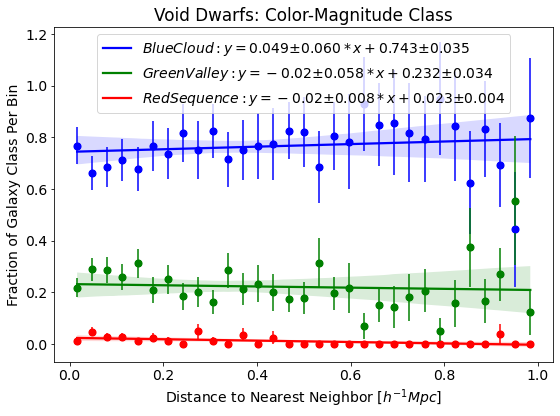

In [74]:
fig, ax = plt.subplots(1,1, figsize=(8,6), tight_layout=True)
plt.rcParams.update({'font.size': 14})
d_max = 1

a = dwarf_table['2D_neighbor_dist'][dwarf_void]
x1 = a[a_class_void] #all values with a 2D neighbor distance and listed CMD class

for select, label, c in zip([blue_cloud[dwarf_void], green_valley[dwarf_void], red_seq[dwarf_void]], ['Blue Cloud', 'Green Valley', 'Red Sequence'], ['b','g', 'r']):
    
    x = dwarf_table['2D_neighbor_dist'][dwarf_void][select] #values with a 2D distance for each CMD class
    
    counts,bin_edges = np.histogram(x,31, range = (0,1)) #counts = number of objects in each bin for each class
    
    counts2,bin_edges2 = np.histogram(x1,31, range = (0,1)) #counts2 = number of objects total in each bin
    
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.

    #print(counts)
    
    fraction = counts/counts2 # (number of objects with specific class / total objects) for each bin
    err = np.sqrt(counts)/counts2 #calculating error for each point 
    
    #plt.errorbar(bin_centers, fraction, yerr=err, fmt='o', color = c, label = label) #plotting points and error bars
    
    #adding fit line
    result = stats.linregress(bin_centers, fraction)
    sns.regplot(x=bin_centers, y=fraction, x_bins=bin_centers, color=c, ax=ax,  
                line_kws={'label': '$%s : y=%3.5s ± %3.5s*x+%3.5s± %3.5s$'%(label,
                                                                               result.slope,
                                                                               result.stderr,
                                                                               result.intercept,
                                                                               result.intercept_stderr)})
    
    plt.errorbar(bin_centers, fraction, yerr=err, fmt='o', color = c)#, label = label) #plotting points and error bars
    
    
    
    
    
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('Fraction of Galaxy Class Per Bin')
plt.title('Void Dwarfs: Color-Magnitude Class')
plt.legend(loc = 'upper center')
plt.show()

fig.savefig('void_color_mag.png', dpi = 300, format = 'png')

#print(counts2)